##### 1. Stwórz nową bazę danych o nazwie 'shop'.

In [ ]:
!pip install mysql-connector-python

In [3]:
HOST = ''
PORT = 
USER = ''
PASSWORD = ''
DB = ''

In [4]:
# konfigurujemy połączenie
from mysql.connector import connect

cnx = connect(
    host=HOST,
    port=PORT,
    user=USER,
    password=PASSWORD,
    db=DB
)
print(type(cnx))
print(dir(cnx))
cnx.close()

<class 'mysql.connector.connection_cext.CMySQLConnection'>
['_MySQLConnectionAbstract__charset_id', '__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_add_default_conn_attrs', '_allow_local_infile', '_allow_local_infile_in_path', '_auth_plugin', '_auth_plugin_class', '_autocommit', '_buffered', '_character_set', '_charset_id', '_check_server_version', '_client_flags', '_client_host', '_client_port', '_cmysql', '_columns', '_compress', '_conn_attrs', '_connection_timeout', '_consume_results', '_converter_class', '_converter_str_fallback', '_database', '_do_handshake', '_execute_query', '_fo

Obiekt klasy `Connection` jest menadżerem kontekstu.

In [5]:
with connect(
    host=HOST,
    port=PORT,
    user=USER,
    password=PASSWORD,
    db=DB
) as cnx:
    cursor = cnx.cursor()
    print(type(cursor))
    print(dir(cursor))
    cursor.close()


<class 'mysql.connector.cursor_cext.CMySQLCursor'>
['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_affected_rows', '_batch_insert', '_binary', '_buffered', '_check_executed', '_connection', '_description', '_execute_iter', '_executed', '_executed_list', '_fetch_warnings', '_handle_eof', '_handle_result', '_handle_resultset', '_handle_warnings', '_last_insert_id', '_nextrow', '_raw', '_raw_as_string', '_rowcount', '_stored_results', '_warning_count', '_warnings', 'add_attribute', 'arraysize', 'callproc', 'clear_attributes', 'close', 'column_names', 'description', 'execute', 'execut

In [6]:
CREATE_DATABASE_QUERY = """CREATE DATABASE IF NOT EXISTS shop;"""

with connect(
    host=HOST,
    port=PORT,
    user=USER,
    password=PASSWORD,
    db=DB
) as cnx:
    with cnx.cursor() as cursor:
        cursor.execute(CREATE_DATABASE_QUERY)

4. W bazie danych 'shop stwórz tabele:

A. 'client' z następującymi kolumnami:

<code>id INT AUTO_INCREMENT PRIMARY KEY,
first_name VARCHAR(100) NOT NULL,
last_name VARCHAR(100) NOT NULL,
email VARCHAR(100) UNIQUE</code>

B. `product` z następującymi kolumnami:

<code>id INT AUTO_INCREMENT PRIMARY KEY,
name VARCHAR(100) NOT NULL,
price DECIMAL(10, 2) NOT NULL,
stock_quantity INT NOT NULL</code>

C. `order_detail` z następującymi kolumnami:

<code>id INT AUTO_INCREMENT PRIMARY KEY,
client_id INT NOT NULL,
product_id INT NOT NULL,
quantity INT NOT NULL,
order_date DATE NOT NULL</code>

`client_id` i `product_id` to klucze obce odpowiednio do tabel 'client' i 'product'

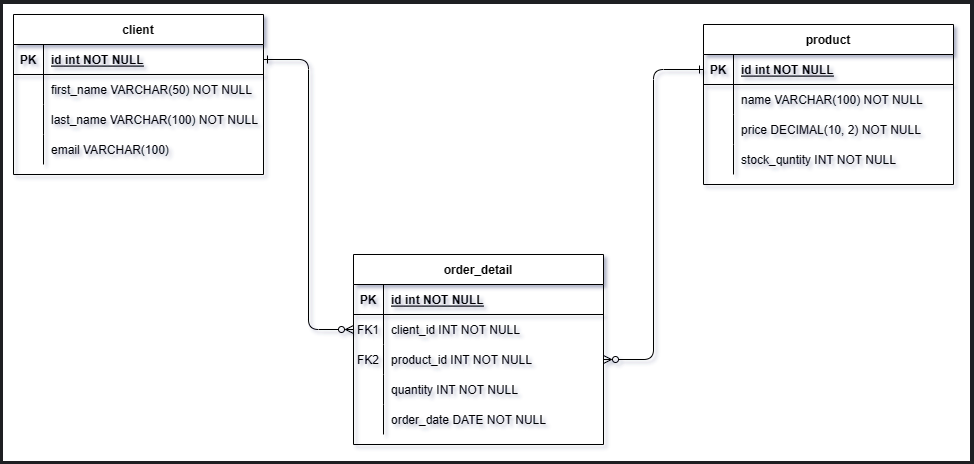

In [7]:
CREATE_CLIENT_TABLE = """
CREATE TABLE IF NOT EXISTS client (
    id INT AUTO_INCREMENT PRIMARY KEY,
    first_name VARCHAR(50) NOT NULL,
    last_name VARCHAR(100) NOT NULL,
    email VARCHAR(100)
)"""

CREATE_PRODUCT_TABLE = """
CREATE TABLE IF NOT EXISTS product (
    id INT AUTO_INCREMENT PRIMARY KEY,
    name VARCHAR(100) NOT NULL,
    price DECIMAL(10, 2) NOT NULL,
    stock_quantity INT NOT NULL
)
"""

CREATE_ORDER_DETAIL_TABLE = """
CREATE TABLE IF NOT EXISTS order_detail (
    id INT AUTO_INCREMENT PRIMARY KEY,
    client_id INT NOT NULL,
    product_id INT NOT NULL,
    quantity INT NOT NULL,
    order_date DATE NOT NULL,
    FOREIGN KEY (client_id) REFERENCES client(id),
    FOREIGN KEY (product_id) REFERENCES product(id)
)
"""

In [8]:
DB = "shop"

In [9]:
with connect(
    host=HOST,
    port=PORT,
    user=USER,
    password=PASSWORD,
    db=DB
) as cnx:
    with cnx.cursor() as cursor:
        cursor.execute(CREATE_CLIENT_TABLE)
        cursor.execute(CREATE_PRODUCT_TABLE)
        cursor.execute(CREATE_ORDER_DETAIL_TABLE)
    
    # conn.commit()  # optional for DDL

5. Dodaj kilka rekordów do tabeli `client` zawierających imiona, nazwiska i adresy e-mail klientów.

'John','Doe','john.doe@example.com' \
'Alice','Smith','alice.smith@example.com' \
'Michael','Johnson','michael.johnson@example.com' \
'Emily','Brown','emily.brown@example.com' \
'David','Jones','david.jones@example.com'

In [10]:
INSERT_CLIENT_1 = """
INSERT INTO client (first_name, last_name, email) VALUES 
('John','Doe','john.doe@example.com');
"""

INSERT_CLIENT_2 = """
INSERT INTO client (first_name, last_name, email) VALUES 
('Alice','Smith','alice.smith@example.com');
"""

INSERT_CLIENT_3 = """
INSERT INTO client (first_name, last_name, email) VALUES 
('Michael','Johnson','michael.johnson@example.com');
"""

INSERT_CLIENT_4 = """
INSERT INTO client (first_name, last_name, email) VALUES 
('Emily','Brown','emily.brown@example.com');
"""

INSERT_CLIENT_5 = """
INSERT INTO client (first_name, last_name, email) VALUES 
('David','Jones','david.jones@example.com');
"""

In [11]:
# Ewentualnie
INSERT_CLIENTS = """
INSERT INTO client (first_name, last_name, email) VALUES 
('John','Doe','john.doe@example.com'),
('Alice','Smith','alice.smith@example.com'),
('Michael','Johnson','michael.johnson@example.com'),
('Emily','Brown','emily.brown@example.com'),
('David','Jones','david.jones@example.com')
"""

In [12]:
with connect(
    host=HOST,
    port=PORT,
    user=USER,
    password=PASSWORD,
    db=DB
) as cnx:
    with cnx.cursor() as cursor:
        cursor.execute(INSERT_CLIENT_1)
        cursor.execute(INSERT_CLIENT_2)
        cursor.execute(INSERT_CLIENT_3)
        cursor.execute(INSERT_CLIENT_4)
        cursor.execute(INSERT_CLIENT_5)

        cnx.commit()  # obowiązkowo dla DML. Uwaga! Bez commita sekwencja i tak się podbije!

6. Dodaj osiem rekordów do tabeli `product`

'Smartfon', 1500, 35 \
'Telewizor LED 55"', 3500.50, 10 \
'Konsola do gier', 1200, 3000 \
'Słuchawki bezprzewodowe', 200, 5 \
'Mikrofon', 100, 5 \
'Samochód', 20000, 2 \
'Cukierki', 20, 100 \
'Kawa', 80, 5

In [13]:
# execute many

# percent style
INSERT_PRODUCTS = """
INSERT INTO product (name, price, stock_quantity) VALUES
(%s, %s, %s);
"""

PRODUCTS = [
    ('Smartfon', 1500, 35),
    ('Telewizor LED 55"', 3500.50, 10),
    ('Konsola do gier', 1200, 3000),
    ('Słuchawki bezprzewodowe', 200, 5),
    ('Mikrofon', 100, 5),
    ('Samochód', 20000, 2),
    ('Cukierki', 20, 100),
    ('Kawa', 80, 5),
]

with connect(
    host=HOST,
    port=PORT,
    user=USER,
    password=PASSWORD,
    db=DB
) as cnx:
    with cnx.cursor() as cursor:
        cursor.executemany(INSERT_PRODUCTS, PRODUCTS)
        cnx.commit()

7. Dodaj kilka rekordów do tabeli "order_detail".

1,1,3,'2024-03-04' \
2,3,2,'2024-03-05' \
3,2,1,'2024-03-06' \
1,4,2,'2024-03-07' \
2,5,1,'2024-03-08'

In [14]:
import datetime

INSERT_ORDERS = """
INSERT INTO order_detail(client_id, product_id, quantity, order_date) VALUES
(%s, %s, %s, %s);
"""
ORDERS = [
    (4, 1, 3, datetime.date(2024, 3, 4)),
    (2, 6, 2, datetime.date(2024, 3, 5)),
    (3, 2, 1, datetime.date(2024, 3, 6)),
    (4, 7, 2, datetime.date(2024, 3, 7)),
    (2, 5, 1, datetime.date(2024, 3, 8))
]

with connect(
    host=HOST,
    port=PORT,
    user=USER,
    password=PASSWORD,
    db=DB
) as cnx:
    with cnx.cursor() as cursor:
        cursor.executemany(INSERT_ORDERS, ORDERS)
        cnx.commit()

DQL - fetchall()

8. Wykonaj zapytanie SQL wyświetlające wszystkie wpisy z tabeli `client`.

In [15]:
stmt = """SELECT * FROM client;"""

with connect(
    host=HOST,
    port=PORT,
    user=USER,
    password=PASSWORD,
    db=DB
) as cnx:
    with cnx.cursor() as cursor:
        cursor.execute(stmt)
        result = cursor.fetchall()  # list of tuples

print(result)

[(1, 'John', 'Doe', 'john.doe@example.com'), (2, 'Alice', 'Smith', 'alice.smith@example.com'), (3, 'Michael', 'Johnson', 'michael.johnson@example.com'), (4, 'Emily', 'Brown', 'emily.brown@example.com'), (5, 'David', 'Jones', 'david.jones@example.com')]


DQL - fetchone() 

8. Wykonaj zapytanie SQL wyświetlające wszystkie wpisy z tabeli `client`.

In [16]:
stmt = """SELECT * FROM client;"""

with connect(
    host=HOST,
    port=PORT,
    user=USER,
    password=PASSWORD,
    db=DB
) as cnx:
    with cnx.cursor() as cursor:
        cursor.execute(stmt)
        result = cursor.fetchone()
        while result:
            print(result)
            result = cursor.fetchone()

(1, 'John', 'Doe', 'john.doe@example.com')
(2, 'Alice', 'Smith', 'alice.smith@example.com')
(3, 'Michael', 'Johnson', 'michael.johnson@example.com')
(4, 'Emily', 'Brown', 'emily.brown@example.com')
(5, 'David', 'Jones', 'david.jones@example.com')


DQL - fetchmany()

8. Wykonaj zapytanie SQL wyświetlające wszystkie wpisy z tabeli `client`.

In [17]:
stmt = """SELECT * FROM client;"""

with connect(
    host=HOST,
    port=PORT,
    user=USER,
    password=PASSWORD,
    db=DB
) as cnx:
    with cnx.cursor() as cursor:
        cursor.execute(stmt)
        batch = cursor.fetchmany(size=2) 
        while batch:
            for row in batch:
                print(row)
            batch = cursor.fetchmany(size=2)


(1, 'John', 'Doe', 'john.doe@example.com')
(2, 'Alice', 'Smith', 'alice.smith@example.com')
(3, 'Michael', 'Johnson', 'michael.johnson@example.com')
(4, 'Emily', 'Brown', 'emily.brown@example.com')
(5, 'David', 'Jones', 'david.jones@example.com')


DQL - cursor as an iterator

9. Wykonaj zapytanie SQL wyświetlające wszystkie wpisy z tabeli 'client'.

In [18]:
with connect(
    host=HOST,
    port=PORT,
    user=USER,
    password=PASSWORD,
    db=DB
) as cnx:
    with cnx.cursor(dictionary=True) as cursor:
        cursor.execute(stmt)

        for row in cursor:
            print(row)


{'id': 1, 'first_name': 'John', 'last_name': 'Doe', 'email': 'john.doe@example.com'}
{'id': 2, 'first_name': 'Alice', 'last_name': 'Smith', 'email': 'alice.smith@example.com'}
{'id': 3, 'first_name': 'Michael', 'last_name': 'Johnson', 'email': 'michael.johnson@example.com'}
{'id': 4, 'first_name': 'Emily', 'last_name': 'Brown', 'email': 'emily.brown@example.com'}
{'id': 5, 'first_name': 'David', 'last_name': 'Jones', 'email': 'david.jones@example.com'}


DQL filtrowanie = klauzula WHERE

10. Wykonaj zapytanie SQL wyświetlające wszystkie wpisy z tabeli `client`

In [19]:
stmt = """SELECT first_name, last_name FROM client WHERE id=4;"""

with connect(
    host=HOST,
    port=PORT,
    user=USER,
    password=PASSWORD,
    db=DB
) as cnx:
    with cnx.cursor(dictionary=True) as cursor:
        cursor.execute(stmt)

        for row in cursor:
            print(row)

{'first_name': 'Emily', 'last_name': 'Brown'}


DQL - JOIN

9. Wyświetl klientów razem z produkatmi które kupili.

In [20]:
stmt = """
SELECT c.first_name, c.last_name, p.name, od.quantity FROM order_detail as od JOIN 
client as c ON od.client_id=c.id JOIN
product as p ON od.product_id=p.id
;"""

with connect(
    host=HOST,
    port=PORT,
    user=USER,
    password=PASSWORD,
    db=DB
) as cnx:
    with cnx.cursor(dictionary=True) as cursor:
        cursor.execute(stmt)

        for row in cursor:
            print(row)

{'first_name': 'Emily', 'last_name': 'Brown', 'name': 'Smartfon', 'quantity': 3}
{'first_name': 'Alice', 'last_name': 'Smith', 'name': 'Samochód', 'quantity': 2}
{'first_name': 'Michael', 'last_name': 'Johnson', 'name': 'Telewizor LED 55"', 'quantity': 1}
{'first_name': 'Emily', 'last_name': 'Brown', 'name': 'Cukierki', 'quantity': 2}
{'first_name': 'Alice', 'last_name': 'Smith', 'name': 'Mikrofon', 'quantity': 1}


In [21]:
stmt = """
SELECT * FROM order_detail;"""

with connect(
    host=HOST,
    port=PORT,
    user=USER,
    password=PASSWORD,
    db=DB
) as cnx:
    with cnx.cursor(dictionary=True) as cursor:
        cursor.execute(stmt)

        for row in cursor:
            print(row)

{'id': 1, 'client_id': 4, 'product_id': 1, 'quantity': 3, 'order_date': datetime.date(2024, 3, 4)}
{'id': 2, 'client_id': 2, 'product_id': 6, 'quantity': 2, 'order_date': datetime.date(2024, 3, 5)}
{'id': 3, 'client_id': 3, 'product_id': 2, 'quantity': 1, 'order_date': datetime.date(2024, 3, 6)}
{'id': 4, 'client_id': 4, 'product_id': 7, 'quantity': 2, 'order_date': datetime.date(2024, 3, 7)}
{'id': 5, 'client_id': 2, 'product_id': 5, 'quantity': 1, 'order_date': datetime.date(2024, 3, 8)}


10. DQL - Operacje na danych oddelegowujemy do bazy

11. Zapis do csv

In [22]:
stmt = """SELECT * FROM client;"""

with open('test2.csv', 'w+') as file_:
    file_.write(f"id,name,surname,email\n")
    with connect(
        host=HOST,
        port=PORT,
        user=USER,
        password=PASSWORD,
        db=DB
    ) as cnx:
        with cnx.cursor(dictionary=True) as cursor:
            cursor.execute(stmt)
    
            for row in cursor:
                file_.write(f"{row.get('id')},{row.get('first_name')},{row.get('last_name')},{row.get('email')}\n")